In [85]:
import pandas as pd
from textblob import TextBlob
import csv
from gutenberg.acquire import load_etext
from gutenberg.cleanup import strip_headers
import os
import numpy as np

In [156]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

In [ ]:
n = 55
t = 'wizard'
s = 32

In [ ]:
novel = strip_headers(load_etext(n))
novel = novel.replace('\n', ' ')
novel = TextBlob(novel)
novel_sentences = novel.sentences
novel_title = t

In [ ]:
for l in range(2):
    novelWriter = csv.writer(open('novel_'+ novel_title + '.csv', 'w'), delimiter=',')
    for sentence in novel_sentences:
        novelWriter.writerow([sentence])

In [ ]:
df_novel = pd.read_csv('novel_' + novel_title + '2.csv', skiprows = s, header = None)

In [ ]:
df_novel.head()

In [ ]:
df_novel.rename(columns={0:'Sentences'}, inplace=True)

In [ ]:
wrd_length = []
total_char = []
def wrd_char_counts(sentence):
    total_chars = 0
    wrd_counts = []
    for word in sentence:
        char_count = len(word)
        wrd_counts.append(char_count)
        total_chars += char_count
    total_char.append(total_chars)
    wrd_length.append(wrd_counts)

In [ ]:
for l in df_novel['Sentences']:
    sent = TextBlob(l)
    wrd_char_counts(sent.words)

In [ ]:
df_novel['wrd_length'] = wrd_length
df_novel['char_length'] = total_char

In [ ]:
df_novel.head()

In [ ]:
df_novel.to_csv('novel_' + novel_title + '2.csv', index=False)

In [ ]:
df_novel2 = pd.read_csv('novel_' + novel_title + '2.csv')

In [ ]:
df_novel2.head()

In [ ]:
df_novel3 = pd.read_csv('data/novel_wizard3.csv')

In [86]:
df_novel = pd.read_csv('data/novel_' + 'wizard' + '3.csv', index_col=False) 

In [87]:
df_novel.head()


,0,wrd_length,char_length
0,The Wonderful Wizard of Oz by...,"[3, 9, 6, 2, 2, 2, 1, 5, 4, 8, 12, 1]",55
1,The Cyclone 2.,"[3, 7, 1]",11
2,The Council with the Munchkins 3.,"[3, 7, 4, 3, 9, 1]",27
3,How Dorothy Saved the Scarecrow 4.,"[3, 7, 5, 3, 9, 1]",28
4,The Road Through the Forest 5.,"[3, 4, 7, 3, 6, 1]",24


In [ ]:
df_novel['0']

In [ ]:
key = pd.read_csv('data/novel_key.csv', index_col=False)


In [ ]:
key.head()

In [ ]:
df = pd.read_csv('data/novel_al')

In [89]:
def CountSyllables(word, isName=True):
    vowels = "aeiouy"
    #single syllables in words like bread and lead, but split in names like Breanne and Adreann
    specials = ["ia","ea"] if isName else ["ia"]
    specials_except_end = ["ie","ya","es","ed"]  #seperate syllables unless ending the word
    currentWord = word.lower()
    numVowels = 0
    lastWasVowel = False
    last_letter = ""

    for letter in currentWord:
        if letter in vowels:
            #don't count diphthongs unless special cases
            combo = last_letter+letter
            if lastWasVowel and combo not in specials and combo not in specials_except_end:
                lastWasVowel = True
            else:
                numVowels += 1
                lastWasVowel = True
        else:
            lastWasVowel = False

        last_letter = letter

    #remove es & ed which are usually silent
    if len(currentWord) > 2 and currentWord[-2:] in specials_except_end:
        numVowels -= 1

    #remove silent single e, but not ee since it counted it before and we should be correct
    elif len(currentWord) > 2 and currentWord[-1:] == "e" and currentWord[-2:] != "ee" and currentWord != 'the':
        numVowels -= 1

    return numVowels

In [90]:
syl = []
for l in df_novel['0']:
    sent = TextBlob(l)
    syl_single = []
    for x in sent.words:
        m = CountSyllables(x)
        syl_single.append(m)
    syl.append(syl_single)    

In [ ]:
syl

In [91]:
df_novel['syl_count'] = syl

In [92]:
df_novel.head()

,0,wrd_length,char_length,syl_count
0,The Wonderful Wizard of Oz by...,"[3, 9, 6, 2, 2, 2, 1, 5, 4, 8, 12, 1]",55,"[1, 3, 2, 1, 1, 1, 0, 1, 1, 2, 4, 0]"
1,The Cyclone 2.,"[3, 7, 1]",11,"[1, 2, 0]"
2,The Council with the Munchkins 3.,"[3, 7, 4, 3, 9, 1]",27,"[1, 2, 1, 1, 2, 0]"
3,How Dorothy Saved the Scarecrow 4.,"[3, 7, 5, 3, 9, 1]",28,"[1, 3, 1, 1, 3, 0]"
4,The Road Through the Forest 5.,"[3, 4, 7, 3, 6, 1]",24,"[1, 1, 1, 1, 2, 0]"


In [96]:
for n in range(0,5):
    t = sum(df_novel['syl_count'][n])
    print t

17
3
7
9
6


In [97]:
syl_count_arr = []
for n in df_novel['syl_count']:
    n = np.array(n)
    syl_count_arr.append(n)

In [ ]:
syl_count_arr

In [98]:
df_novel['syl_count_arr'] = syl_count_arr

In [99]:
df_novel.head()

,0,wrd_length,char_length,syl_count,syl_count_arr
0,The Wonderful Wizard of Oz by...,"[3, 9, 6, 2, 2, 2, 1, 5, 4, 8, 12, 1]",55,"[1, 3, 2, 1, 1, 1, 0, 1, 1, 2, 4, 0]","[1, 3, 2, 1, 1, 1, 0, 1, 1, 2, 4, 0]"
1,The Cyclone 2.,"[3, 7, 1]",11,"[1, 2, 0]","[1, 2, 0]"
2,The Council with the Munchkins 3.,"[3, 7, 4, 3, 9, 1]",27,"[1, 2, 1, 1, 2, 0]","[1, 2, 1, 1, 2, 0]"
3,How Dorothy Saved the Scarecrow 4.,"[3, 7, 5, 3, 9, 1]",28,"[1, 3, 1, 1, 3, 0]","[1, 3, 1, 1, 3, 0]"
4,The Road Through the Forest 5.,"[3, 4, 7, 3, 6, 1]",24,"[1, 1, 1, 1, 2, 0]","[1, 1, 1, 1, 2, 0]"


In [101]:
for l in range(0,5):
    t = df_novel['syl_count_arr'][l].sum()
    print t

17
3
7
9
6


In [102]:
syl_sum = []
for l in range(0,len(df_novel)):
    syl_sum.append(df_novel['syl_count_arr'][l].sum())

In [ ]:
syl_sum

In [104]:
df_novel['syl_sum'] = syl_sum

In [105]:
df_novel.head()

,0,wrd_length,char_length,syl_count,syl_count_arr,syl_sum
0,The Wonderful Wizard of Oz by...,"[3, 9, 6, 2, 2, 2, 1, 5, 4, 8, 12, 1]",55,"[1, 3, 2, 1, 1, 1, 0, 1, 1, 2, 4, 0]","[1, 3, 2, 1, 1, 1, 0, 1, 1, 2, 4, 0]",17
1,The Cyclone 2.,"[3, 7, 1]",11,"[1, 2, 0]","[1, 2, 0]",3
2,The Council with the Munchkins 3.,"[3, 7, 4, 3, 9, 1]",27,"[1, 2, 1, 1, 2, 0]","[1, 2, 1, 1, 2, 0]",7
3,How Dorothy Saved the Scarecrow 4.,"[3, 7, 5, 3, 9, 1]",28,"[1, 3, 1, 1, 3, 0]","[1, 3, 1, 1, 3, 0]",9
4,The Road Through the Forest 5.,"[3, 4, 7, 3, 6, 1]",24,"[1, 1, 1, 1, 2, 0]","[1, 1, 1, 1, 2, 0]",6


In [107]:
def detect_sentiment(text):
    return TextBlob(text.decode('utf-8')).sentiment.polarity

In [109]:
df_novel['sentiment'] = df_novel['0'].apply(detect_sentiment)

In [117]:
df_novel[100:110]

,0,wrd_length,char_length,syl_count,syl_count_arr,syl_sum,sentiment,syl_ratio
100,They were not as big as the grown folk she had...,"[4, 4, 3, 2, 3, 2, 3, 5, 4, 3, 3, 6, 4, 4, 2, ...",79,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, ...",23,-0.162500,0.291139
101,"In fact, they seemed about as tall as Dorothy,...","[2, 4, 4, 6, 5, 2, 4, 2, 7, 3, 3, 1, 10, 5, 3,...",111,"[1, 1, 1, 1, 2, 1, 1, 1, 3, 1, 1, 1, 2, 1, 1, ...","[1, 1, 1, 1, 2, 1, 1, 1, 3, 1, 1, 1, 2, 1, 1, ...",36,0.255556,0.324324
102,"Three were men and one a woman, and all were o...","[5, 4, 3, 3, 3, 1, 5, 3, 3, 4, 5, 7]",46,"[1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1]","[1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1]",14,-0.166667,0.304348
103,They wore round hats that rose to a small poin...,"[4, 4, 5, 4, 4, 4, 2, 1, 5, 5, 1, 4, 5, 5, 5, ...",116,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, ...",31,0.052083,0.267241
104,The hats of the men were blue; the little woma...,"[3, 4, 2, 3, 3, 4, 4, 3, 6, 5, 2, 3, 3, 5, 3, ...",102,"[1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 0, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 0, 1, 1, 1, 1, ...",27,-0.046875,0.264706
105,Over it were sprinkled little stars that glist...,"[4, 2, 4, 9, 6, 5, 4, 9, 2, 3, 3, 4, 8]",63,"[2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 3]","[2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 3]",17,-0.187500,0.269841
106,"The men were dressed in blue, of the same shad...","[3, 3, 4, 7, 2, 4, 2, 3, 4, 5, 2, 5, 4, 3, 4, ...",101,"[1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",26,0.000000,0.257426
107,"The men, Dorothy thought, were about as old as...","[3, 3, 7, 7, 4, 5, 2, 3, 2, 5, 5, 3, 3, 2, 4, ...",67,"[1, 1, 3, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, ...","[1, 1, 3, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, ...",22,0.100000,0.328358
108,But the little woman was doubtless much older.,"[3, 3, 6, 5, 3, 9, 4, 5]",38,"[1, 1, 1, 2, 1, 2, 1, 2]","[1, 1, 1, 2, 1, 2, 1, 2]",11,-0.010417,0.289474
109,"Her face was covered with wrinkles, her hair w...","[3, 4, 3, 7, 4, 8, 3, 4, 3, 6, 5, 3, 3, 6, 6, 7]",75,"[1, 1, 1, 2, 1, 1, 1, 1, 1, 3, 1, 1, 0, 1, 2, 2]","[1, 1, 1, 2, 1, 1, 1, 1, 1, 3, 1, 1, 0, 1, 2, 2]",20,-0.107143,0.266667


In [115]:
df_novel['syl_ratio'] = df_novel['syl_sum']/df_novel['char_length']

In [120]:
feature_cols = ['syl_sum']
X = df_novel[feature_cols]
y = df_novel.sentiment

y.shape

(2271,)

In [121]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [122]:
print linreg.intercept_
print linreg.coef_

0.0253052494233
[ 0.00264149]


a .002 increase in sentiment equals one syllable increase

In [127]:
feature_cols = ['char_length']
X = df_novel[feature_cols]
linreg = LinearRegression()
linreg.fit(X, y)
print linreg.intercept_
print linreg.coef_

0.031463032679
[ 0.00073662]


In [128]:
feature_cols = ['syl_ratio']
X = df_novel[feature_cols]
linreg.fit(X,y)
print linreg.intercept_
print linreg.coef_

-0.0387154209797
[ 0.39262327]


In [129]:
syl_mean = []
for l in range(0, len(df_novel)):
    syl_mean.append(df_novel['syl_count_arr'][l].mean())

In [ ]:
syl_mean

In [131]:
df_novel['syl_mean'] = syl_mean

In [132]:
df_novel.head()

,0,wrd_length,char_length,syl_count,syl_count_arr,syl_sum,sentiment,syl_ratio,syl_mean
0,The Wonderful Wizard of Oz by...,"[3, 9, 6, 2, 2, 2, 1, 5, 4, 8, 12, 1]",55,"[1, 3, 2, 1, 1, 1, 0, 1, 1, 2, 4, 0]","[1, 3, 2, 1, 1, 1, 0, 1, 1, 2, 4, 0]",17,1.0,0.309091,1.416667
1,The Cyclone 2.,"[3, 7, 1]",11,"[1, 2, 0]","[1, 2, 0]",3,0.0,0.272727,1.000000
2,The Council with the Munchkins 3.,"[3, 7, 4, 3, 9, 1]",27,"[1, 2, 1, 1, 2, 0]","[1, 2, 1, 1, 2, 0]",7,0.0,0.259259,1.166667
3,How Dorothy Saved the Scarecrow 4.,"[3, 7, 5, 3, 9, 1]",28,"[1, 3, 1, 1, 3, 0]","[1, 3, 1, 1, 3, 0]",9,0.0,0.321429,1.500000
4,The Road Through the Forest 5.,"[3, 4, 7, 3, 6, 1]",24,"[1, 1, 1, 1, 2, 0]","[1, 1, 1, 1, 2, 0]",6,0.0,0.250000,1.000000


In [ ]:
import seaborn as sb
sb.factorplot(
    hue='Promo',
    x='index',
    y='syl_count_arr',
    data=df_novel[df_novel.sentiment==1],
    kind='point' 
)

In [133]:
feature_cols = ['syl_mean']
X = df_novel[feature_cols]
linreg.fit(X,y)
print linreg.intercept_
print linreg.coef_


0.0106049019438
[ 0.05835128]


In [136]:
linreg.predict(1.5)

array([ 0.09813182])

In [137]:
feature_cols = ['char_length', 'syl_sum', 'syl_ratio', 'syl_mean']
X = df_novel[feature_cols]
linreg.fit(X,y)
print linreg.intercept_
print linreg.coef_


0.011483156015
[-0.00359806  0.01410377 -0.05016868  0.0247951 ]


In [168]:
zip(feature_cols, linreg.coef_)

[('char_length', -0.0035980592728188355),
 ('syl_sum', 0.014103773377192048),
 ('syl_ratio', -0.050168680941922492),
 ('syl_mean', 0.024795096316143919)]

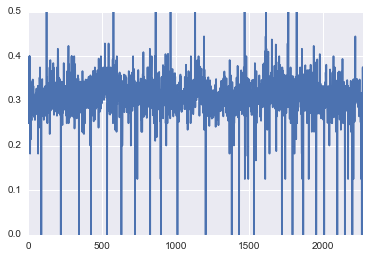

In [138]:
df_novel['syl_ratio'].plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11e371450>]], dtype=object)

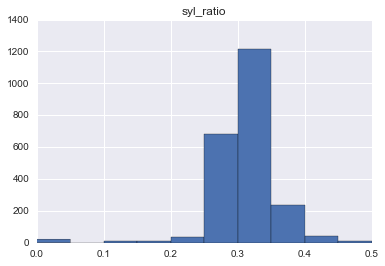

In [149]:
df_novel.hist('syl_ratio')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11f6e8490>]], dtype=object)

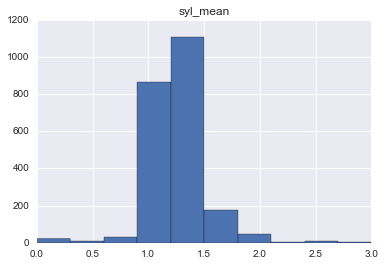

In [152]:
df_novel.hist('syl_mean')

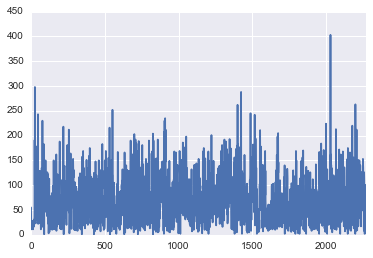

In [147]:
df_novel['char_length'].plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11c6976d0>]], dtype=object)

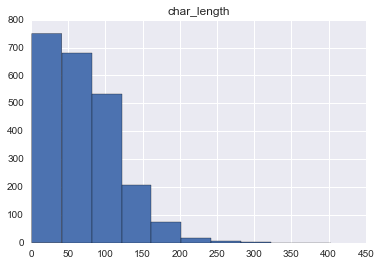

In [145]:
df_novel.hist('char_length')

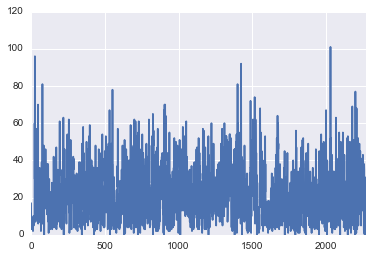

In [142]:
df_novel['syl_sum'].plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11f68cd90>]], dtype=object)

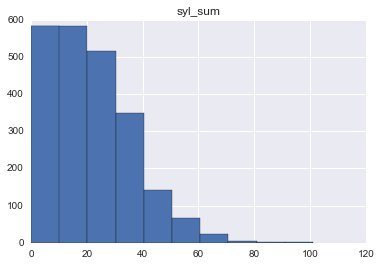

In [150]:
df_novel.hist('syl_sum')

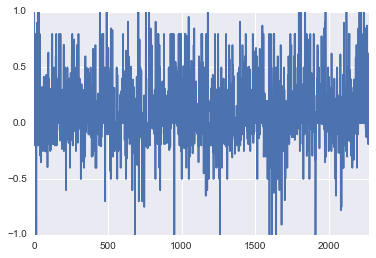

In [143]:
df_novel['sentiment'].plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11f809f50>]], dtype=object)

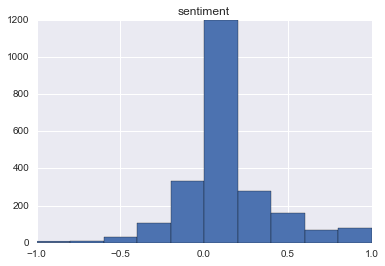

In [151]:
df_novel.hist('sentiment')

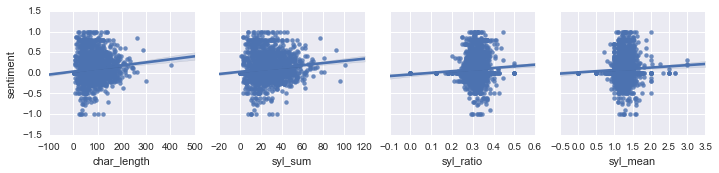

In [154]:
sns.pairplot(df_novel, x_vars=feature_cols, y_vars='sentiment', kind='reg')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1220d1910>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x122d7ed90>]], dtype=object)

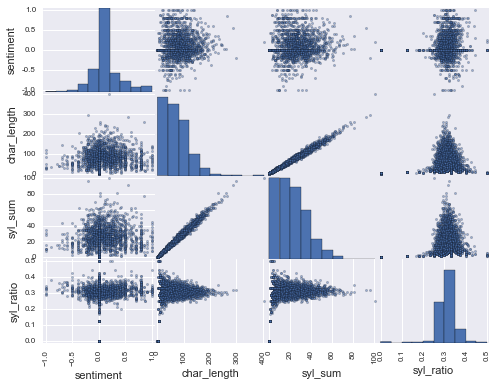

In [157]:
pd.scatter_matrix(df_novel[['sentiment', 'char_length', 'syl_sum', 'syl_ratio'] ])

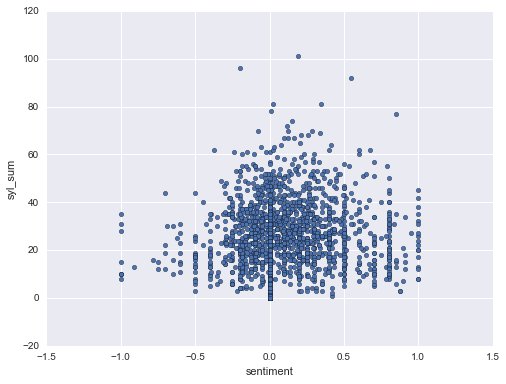

In [158]:
df_novel.plot(kind='scatter', x='sentiment', y='syl_sum')

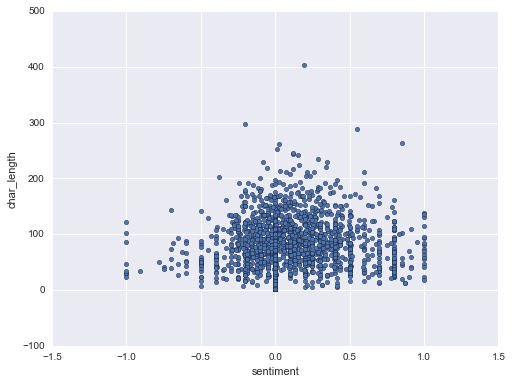

In [160]:
df_novel.plot(kind='scatter', x='sentiment', y ='char_length')

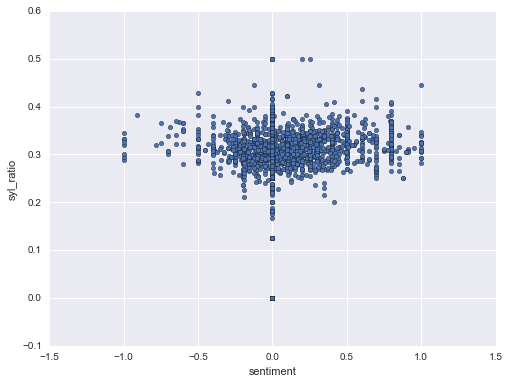

In [159]:
df_novel.plot(kind='scatter', x='sentiment', y ='syl_ratio')

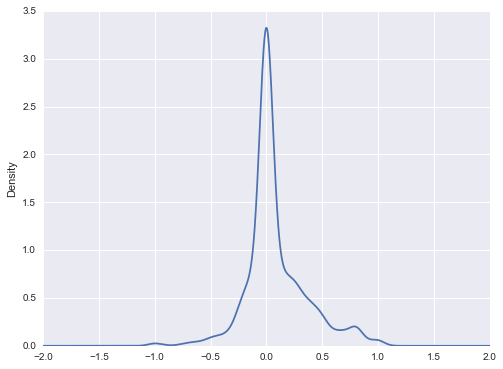

In [162]:
df_novel.sentiment.plot(kind='density')

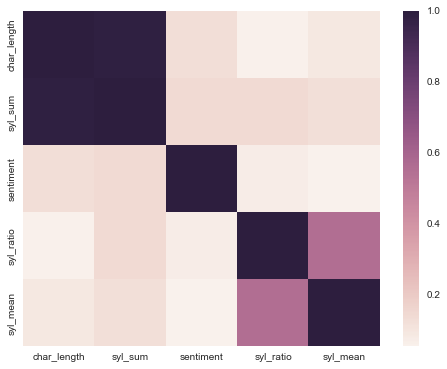

In [165]:
sns.heatmap(df_novel.corr())

In [171]:
from sklearn import metrics
import numpy as np
from sklearn.cross_validation import train_test_split

# define a function that accepts a list of features and returns testing RMSE
def train_test_rmse(feature_cols):
    X = df_novel[feature_cols]
    y = df_novel.sentiment
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [172]:
print train_test_rmse(['char_length', 'syl_sum'])

0.275415997261


In [173]:
print train_test_rmse(['char_length', 'syl_sum', 'syl_ratio'])

0.275412111153


In [174]:
print train_test_rmse(['syl_sum', 'syl_ratio'])

0.27569536635


In [175]:
print train_test_rmse(['char_length', 'syl_sum', 'syl_ratio', 'syl_mean'])

0.275449901083


In [176]:
print train_test_rmse(['char_length','syl_ratio'])

0.275845237068


In [177]:
print train_test_rmse(['char_length'])

0.276316575357


In [178]:
print train_test_rmse(['syl_sum'])

0.276048322856


In [179]:
print train_test_rmse(['char_length', 'syl_sum','syl_mean'])

0.275390979712


In [181]:
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

# create a NumPy array with the same shape as y_test
y_null = np.zeros_like(y_test, dtype=float)

# fill the array with the mean value of y_test
y_null.fill(y_test.mean())


In [182]:
# compute null RMSE
np.sqrt(metrics.mean_squared_error(y_test, y_null))

0.27631044878342009

In [200]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=10, random_state=1)
km.fit(X)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=10, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=1, tol=0.0001,
    verbose=0)

In [201]:
km.labels_

array([2, 0, 5, ..., 0, 0, 0], dtype=int32)

In [202]:
df_novel['cluster'] = km.labels_
df_novel.sort_values('cluster')

,0,wrd_length,char_length,syl_count,syl_count_arr,syl_sum,sentiment,syl_ratio,syl_mean,cluster
2270,"I'm so glad to be at home again!""","[1, 2, 2, 4, 2, 2, 2, 4, 5]",24,"[1, 0, 1, 1, 1, 1, 1, 1, 2]","[1, 0, 1, 1, 1, 1, 1, 1, 2]",9,0.625000,0.375000,1.000000,0
669,asked the Scarecrow.,"[5, 3, 9]",17,"[1, 1, 3]","[1, 1, 3]",5,0.000000,0.294118,1.666667,0
1786,asked Oz.,"[5, 2]",7,"[1, 1]","[1, 1]",2,0.000000,0.285714,1.000000,0
1255,"I will peck his eyes out.""","[1, 4, 4, 3, 4, 3]",19,"[1, 1, 1, 1, 0, 1]","[1, 1, 1, 1, 0, 1]",5,0.000000,0.263158,0.833333,0
344,4.,[1],1,[0],[0],0,0.000000,0.000000,0.000000,0
1792,17.,[2],2,[0],[0],0,0.000000,0.000000,0.000000,0
341,"""What is that?""","[4, 2, 4]",10,"[1, 1, 1]","[1, 1, 1]",3,0.000000,0.300000,1.000000,0
1800,"""And back to Kansas?""","[3, 4, 2, 6]",15,"[1, 1, 1, 2]","[1, 1, 1, 2]",5,0.000000,0.333333,1.250000,0
1801,she asked eagerly.,"[3, 5, 7]",15,"[0, 1, 4]","[0, 1, 4]",5,0.000000,0.333333,1.666667,0
1804,"""How can I cross the desert?""","[3, 3, 1, 5, 3, 6]",21,"[1, 1, 1, 1, 1, 2]","[1, 1, 1, 1, 1, 2]",7,0.000000,0.333333,1.166667,0


In [203]:
km.cluster_centers_

array([[  1.46912752e+01,   4.51230425e+00,   2.93104132e-01,
          1.19131512e+00],
       [  1.14137339e+02,   3.53948498e+01,   3.10404796e-01,
          1.26400684e+00],
       [  5.65740181e+01,   1.77703927e+01,   3.14659388e-01,
          1.23325376e+00],
       [  2.31041667e+02,   7.10833333e+01,   3.07526602e-01,
          1.31941413e+00],
       [  1.72945055e+02,   5.32637363e+01,   3.08026101e-01,
          1.25711559e+00],
       [  3.63000000e+01,   1.15560976e+01,   3.18525292e-01,
          1.25394250e+00],
       [  9.45193798e+01,   2.95155039e+01,   3.12526880e-01,
          1.25114667e+00],
       [  4.03000000e+02,   1.01000000e+02,   2.50620347e-01,
          1.26250000e+00],
       [  1.39877419e+02,   4.34193548e+01,   3.10508899e-01,
          1.26462037e+00],
       [  7.62772586e+01,   2.41526480e+01,   3.16934712e-01,
          1.25732194e+00]])

In [204]:
df_novel.groupby('cluster').mean()

,char_length,syl_sum,sentiment,syl_ratio,syl_mean
cluster,,,,,
0,14.691275,4.512304,0.023000,0.293104,1.191315
1,114.137339,35.394850,0.106505,0.310405,1.264007
2,56.574018,17.770393,0.074715,0.314659,1.233254
3,231.041667,71.083333,0.170557,0.307527,1.319414
4,173.111111,53.377778,0.124222,0.308425,1.258833
5,36.300000,11.556098,0.063124,0.318525,1.253942
6,94.519380,29.515504,0.123732,0.312527,1.251147
7,403.000000,101.000000,0.191204,0.250620,1.262500
8,139.993590,43.416667,0.127434,0.310263,1.263582


In [208]:
sent_length = df_novel['char_length'].value_counts()
len(sent_length)

215

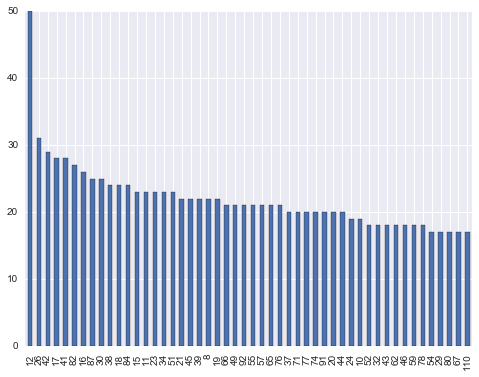

In [213]:
sent_length[:50].plot(kind='bar')

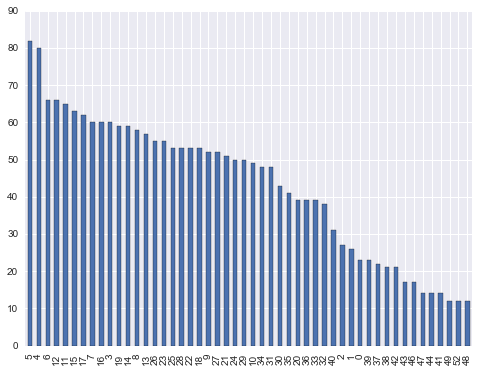

In [224]:
syl[:50].plot(kind='bar')

In [214]:
senti = df_novel['sentiment'].value_counts()

In [216]:
len(senti)

500

In [ ]:
senti[23:50].plot(kind='bar')

In [ ]:
senti[:10].plot(kind='bar')
sent_length = df_novel['char_length'].value_counts()
#sent_length[:50].plot(kind='bar')

In [222]:
syl = df_novel['syl_sum'].value_counts()

In [223]:
syl[:10]

5     82
4     80
6     66
12    66
11    65
15    63
17    62
7     60
16    60
3     60
Name: syl_sum, dtype: int64

In [225]:
long_sent = df_novel[df_novel['char_length']== 403]
long_sent


,0,wrd_length,char_length,syl_count,syl_count_arr,syl_sum,sentiment,syl_ratio,syl_mean,cluster
2030,"There were milkmaids and shepherdesses, with b...","[5, 4, 9, 3, 13, 4, 8, 7, 7, 3, 6, 5, 3, 4, 5,...",403,"[1, 1, 2, 1, 3, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1, ...","[1, 1, 2, 1, 3, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1, ...",101,0.191204,0.25062,1.2625,7


In [226]:
cluster_7 = df_novel[df_novel['cluster'] == 7]

In [227]:
len(cluster_7)

1

In [228]:
cluster_1 = df_novel[df_novel['cluster'] ==1]
len(cluster_1)

233

In [230]:
cluster_1[:5]

,0,wrd_length,char_length,syl_count,syl_count_arr,syl_sum,sentiment,syl_ratio,syl_mean,cluster
29,"It aspires to being a modernized fairy tale, i...","[2, 7, 2, 5, 1, 10, 5, 4, 2, 5, 3, 10, 3, 3, 3...",112,"[1, 2, 1, 1, 1, 3, 2, 1, 1, 1, 1, 3, 1, 1, 1, ...","[1, 2, 1, 1, 1, 3, 2, 1, 1, 1, 1, 3, 1, 1, 1, ...",34,0.400000,0.303571,1.416667,1
32,The Cyclone Dorothy lived in the midst of th...,"[3, 7, 7, 5, 2, 3, 5, 2, 3, 5, 6, 8, 4, 5, 5, ...",113,"[1, 2, 3, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, ...","[1, 2, 3, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, ...",36,0.800000,0.318584,1.285714,1
41,"Even the grass was not green, for the sun had ...","[4, 3, 5, 3, 3, 5, 3, 3, 3, 3, 6, 3, 4, 2, 3, ...",110,"[2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",34,0.016667,0.309091,1.214286,1
42,"Once the house had been painted, but the sun b...","[4, 3, 5, 3, 4, 7, 3, 3, 3, 9, 3, 5, 3, 3, 5, ...",121,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, ...",35,-0.291667,0.289256,1.166667,1
45,They had taken the sparkle from her eyes and l...,"[4, 3, 5, 3, 7, 4, 3, 4, 3, 4, 4, 1, 5, 4, 4, ...",111,"[1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, ...","[1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, ...",31,0.033333,0.279279,1.068966,1


In [233]:
low = df_novel[df_novel['sentiment'] < 0]

In [234]:
len(low)

492

In [236]:
low[:5]

,0,wrd_length,char_length,syl_count,syl_count_arr,syl_sum,sentiment,syl_ratio,syl_mean,cluster
8,The Deadly Poppy Field 9.,"[3, 6, 5, 5, 1]",20,"[1, 3, 2, 2, 0]","[1, 3, 2, 2, 0]",8,-0.200000,0.400000,1.600000,0
15,The Discovery of Oz the Terrible 16.,"[3, 9, 2, 2, 3, 8, 2]",29,"[1, 4, 1, 1, 1, 2, 0]","[1, 4, 1, 1, 1, 2, 0]",10,-1.000000,0.344828,1.428571,5
26,"Yet the old time fairy tale, having served for...","[3, 3, 3, 4, 5, 4, 6, 6, 3, 11, 3, 3, 2, 7, 2,...",298,"[1, 1, 1, 1, 2, 1, 2, 1, 1, 4, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 2, 1, 2, 1, 1, 4, 1, 1, 1, 1, 1, ...",96,-0.200000,0.322148,1.523810,3
35,Uncle Henry and Aunt Em had a big bed in one c...,"[5, 5, 3, 4, 2, 3, 1, 3, 3, 2, 3, 6, 3, 7, 1, ...",75,"[1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 3, 1, ...","[1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 3, 1, ...",25,-0.093750,0.333333,1.250000,9
37,It was reached by a trap door in the middle of...,"[2, 3, 7, 2, 1, 4, 4, 2, 3, 6, 2, 3, 5, 4, 5, ...",87,"[1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",26,-0.138889,0.298851,1.083333,6


In [237]:
cluster_2 = df_novel[df_novel['cluster'] == 2]
len(cluster_2)

331

In [239]:
cluster_3 = df_novel[df_novel['cluster'] == 3]
len(cluster_3)

24

In [240]:
cluster_4 = df_novel[df_novel['cluster'] == 4]
len(cluster_4)

90

In [241]:
cluster_5 = df_novel[df_novel['cluster'] == 5]
len(cluster_5)

410

In [242]:
cluster_6 = df_novel[df_novel['cluster'] == 6]
len(cluster_6)

258

In [243]:
cluster_7 = df_novel[df_novel['cluster'] == 7]
len(cluster_7)

1

In [244]:
cluster_8 = df_novel[df_novel['cluster'] == 8]
len(cluster_8)

156

In [245]:
cluster_9 = df_novel[df_novel['cluster'] == 9]
len(cluster_9)

321

In [247]:
cluster_0 = df_novel[df_novel['cluster'] == 0]
len(cluster_0)

447

In [248]:
cluster_1 = df_novel[df_novel['cluster'] == 1]
len(cluster_1)

233

In [253]:
centers = df_novel.groupby('cluster').mean()

In [249]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14

In [250]:
import numpy as np
colors = np.array(['red', 'green', 'blue', 'yellow'])

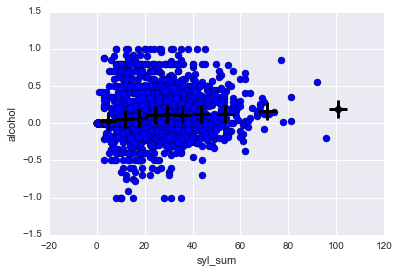

In [254]:
plt.scatter(df_novel.syl_sum, df_novel.sentiment, s=50)
plt.scatter(centers.syl_sum, centers.sentiment, linewidths=3, marker='+', s=300, c='black')
plt.xlabel('syl_sum')
plt.ylabel('alcohol')

In [259]:
df_novel.drop('cluster', axis=1, inplace=True)

In [260]:
df_novel.head()

,0,wrd_length,char_length,syl_count,syl_count_arr,syl_sum,sentiment,syl_ratio,syl_mean
0,The Wonderful Wizard of Oz by...,"[3, 9, 6, 2, 2, 2, 1, 5, 4, 8, 12, 1]",55,"[1, 3, 2, 1, 1, 1, 0, 1, 1, 2, 4, 0]","[1, 3, 2, 1, 1, 1, 0, 1, 1, 2, 4, 0]",17,1.0,0.309091,1.416667
1,The Cyclone 2.,"[3, 7, 1]",11,"[1, 2, 0]","[1, 2, 0]",3,0.0,0.272727,1.000000
2,The Council with the Munchkins 3.,"[3, 7, 4, 3, 9, 1]",27,"[1, 2, 1, 1, 2, 0]","[1, 2, 1, 1, 2, 0]",7,0.0,0.259259,1.166667
3,How Dorothy Saved the Scarecrow 4.,"[3, 7, 5, 3, 9, 1]",28,"[1, 3, 1, 1, 3, 0]","[1, 3, 1, 1, 3, 0]",9,0.0,0.321429,1.500000
4,The Road Through the Forest 5.,"[3, 4, 7, 3, 6, 1]",24,"[1, 1, 1, 1, 2, 0]","[1, 1, 1, 1, 2, 0]",6,0.0,0.250000,1.000000


In [387]:
X.shape

(2246, 8)

In [289]:
km = KMeans(n_clusters=10, random_state=5)
km.fit(X)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=10, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=5, tol=0.0001,
    verbose=0)

In [290]:
km.labels_

array([0, 2, 6, ..., 2, 2, 2], dtype=int32)

In [291]:
df_novel['cluster'] = km.labels_
df_novel.sort_values('cluster')

,0,wrd_length,char_length,syl_count,syl_count_arr,syl_sum,sentiment,syl_ratio,syl_mean,cluster
0,The Wonderful Wizard of Oz by...,"[3, 9, 6, 2, 2, 2, 1, 5, 4, 8, 12, 1]",55,"[1, 3, 2, 1, 1, 1, 0, 1, 1, 2, 4, 0]","[1, 3, 2, 1, 1, 1, 0, 1, 1, 2, 4, 0]",17,1.000000,0.309091,1.416667,0
412,"""Certainly; that is why I know it,"" returned t...","[9, 4, 2, 3, 1, 4, 2, 8, 3, 9]",45,"[3, 1, 1, 1, 1, 1, 1, 2, 1, 3]","[3, 1, 1, 1, 1, 1, 1, 2, 1, 3]",15,0.214286,0.333333,1.500000,0
1512,"He laughed, when he came to the top of the wat...","[2, 7, 4, 2, 4, 2, 3, 3, 2, 3, 5, 3, 4, 2, 2, 5]",53,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1]",17,0.600000,0.320755,1.062500,0
1520,"asked Dorothy, who had been greatly interested...","[5, 7, 3, 3, 4, 7, 10, 2, 3, 5]",49,"[1, 3, 1, 1, 1, 3, 3, 1, 1, 2]","[1, 3, 1, 1, 1, 3, 3, 1, 1, 2]",17,0.250000,0.346939,1.700000,0
404,"""It is such an uncomfortable feeling to know o...","[2, 2, 4, 2, 13, 7, 2, 4, 3, 2, 1, 4]",46,"[1, 1, 1, 1, 4, 2, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 4, 2, 1, 1, 1, 1, 1, 1]",16,-0.250000,0.347826,1.333333,0
402,"""I hope so,"" said Dorothy earnestly, ""since yo...","[1, 4, 2, 4, 7, 9, 5, 3, 4, 7, 2, 4, 4]",56,"[1, 1, 1, 1, 3, 4, 1, 1, 1, 2, 1, 1, 1]","[1, 1, 1, 1, 3, 4, 1, 1, 1, 2, 1, 1, 1]",19,-0.250000,0.339286,1.461538,0
396,Then he hopped down at my feet and ate all the...,"[4, 2, 6, 4, 2, 2, 4, 3, 3, 3, 3, 4, 2, 6]",48,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]",14,-0.155556,0.291667,1.000000,0
395,Any crow of sense could see that you are only ...,"[3, 4, 2, 5, 5, 3, 4, 3, 3, 4, 7, 4, 5]",52,"[2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1]","[2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1]",15,0.000000,0.288462,1.153846,0
1539,"""But I thought you had gone to visit the Wicke...","[3, 1, 7, 3, 3, 4, 2, 5, 3, 6, 5, 2, 3, 4]",51,"[1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1]",15,0.000000,0.294118,1.071429,0
391,"But my feet would not touch the ground, and I ...","[3, 2, 4, 5, 3, 5, 3, 6, 3, 1, 3, 6, 2, 4, 2, ...",60,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",17,-0.300000,0.283333,1.000000,0


In [292]:
km.cluster_centers_

array([[  5.44787879e+01,   1.71333333e+01,   3.15131863e-01,
          1.22972907e+00],
       [  1.40570513e+02,   4.35576923e+01,   3.09925931e-01,
          1.26272321e+00],
       [  1.44726027e+01,   4.44977169e+00,   2.92979999e-01,
          1.18873396e+00],
       [  9.40553506e+01,   2.94022140e+01,   3.12896076e-01,
          1.25380374e+00],
       [  2.31041667e+02,   7.10833333e+01,   3.07526602e-01,
          1.31941413e+00],
       [  7.48629738e+01,   2.36763848e+01,   3.16532560e-01,
          1.25554559e+00],
       [  3.52285714e+01,   1.12025974e+01,   3.18049073e-01,
          1.25799594e+00],
       [  1.73689655e+02,   5.35057471e+01,   3.08103610e-01,
          1.26069973e+00],
       [  4.03000000e+02,   1.01000000e+02,   2.50620347e-01,
          1.26250000e+00],
       [  1.14292373e+02,   3.54830508e+01,   3.10720817e-01,
          1.26382022e+00]])

In [293]:
df_novel.groupby('cluster').mean()

,char_length,syl_sum,sentiment,syl_ratio,syl_mean
cluster,,,,,
0,54.478788,17.133333,0.057704,0.315132,1.229729
1,140.484076,43.541401,0.129524,0.310008,1.263104
2,14.472603,4.449772,0.019706,0.292980,1.188734
3,93.989011,29.369963,0.123633,0.312759,1.252762
4,231.041667,71.083333,0.170557,0.307527,1.319414
5,74.803519,23.668622,0.117078,0.316664,1.256389
6,35.228571,11.202597,0.070319,0.318049,1.257996
7,173.689655,53.505747,0.117906,0.308104,1.260700
8,403.000000,101.000000,0.191204,0.250620,1.262500


In [294]:
centers = df_novel.groupby('cluster').mean()

In [295]:
colors = np.array(['#999999', '#0000ff', '#4d4d4d', '#0000b2', '#8833ff', '#333333', '#4412b2', '#808080', '#33a3ff', '#124cb2', '#666666', ])

AttributeError: 'str' object has no attribute 'pop'

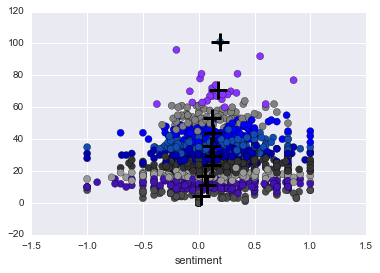

In [302]:
plt.scatter(df_novel.sentiment, df_novel.syl_sum, c=colors[df_novel.cluster], s=50)
plt.scatter(centers.sentiment, centers.syl_sum, linewidth=3, marker='+', s=300, c='black')
plt.xlabel('sentiment', 'syl_sum')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12c8bbcd0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x12d67f610>]], dtype=object)

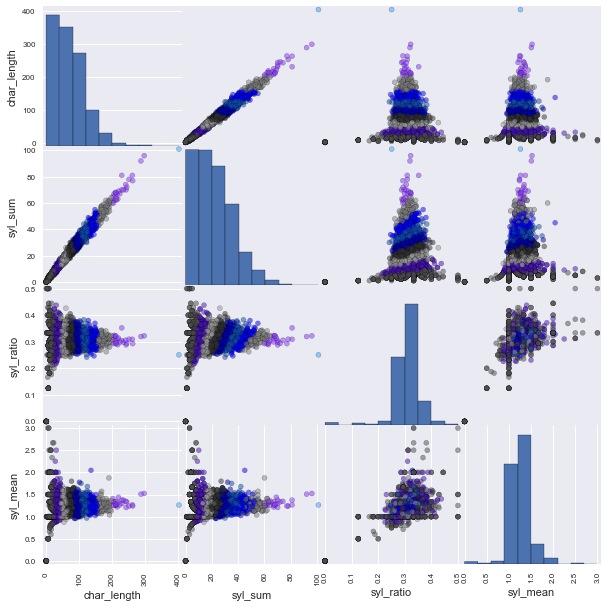

In [303]:
pd.scatter_matrix(X, c=colors[df_novel.cluster], figsize=(10,10), s=100)

In [304]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [306]:
km = KMeans(n_clusters=3, random_state=1)
km.fit(X_scaled)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=1, tol=0.0001,
    verbose=0)

In [ ]:
df_novel['cluster'] = km.labels_
df_novel.sort_values('sentiment')

In [309]:
df_novel.groupby('cluster').mean()

,char_length,syl_sum,sentiment,syl_ratio,syl_mean
cluster,,,,,
0,40.418155,12.691220,0.057686,0.315682,1.252710
1,117.820744,36.706877,0.125200,0.312939,1.266273
2,4.475000,0.500000,0.000000,0.059858,0.306667


In [315]:
cluster2_0 = df_novel[df_novel['cluster'] ==0]
len(cluster2_0)

1344

In [316]:
cluster2_1 = df_novel[df_novel['cluster'] ==1]
len(cluster2_1)

887

In [335]:
cluster2_1

,0,wrd_length,char_length,syl_count,syl_count_arr,syl_sum,sentiment,syl_ratio,syl_mean,cluster
24,"Home Again Introduction Folklore, legend...","[4, 5, 12, 8, 7, 5, 3, 5, 5, 4, 8, 9, 7, 3, 4,...",191,"[1, 2, 4, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, ...","[1, 2, 4, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, ...",60,0.600000,0.314136,1.875000,1
25,The winged fairies of Grimm and Andersen have ...,"[3, 6, 7, 2, 5, 3, 8, 4, 7, 4, 9, 2, 8, 6, 4, ...",100,"[1, 1, 2, 1, 1, 1, 3, 1, 1, 1, 3, 1, 2, 2, 1, ...","[1, 1, 2, 1, 1, 1, 3, 1, 1, 1, 3, 1, 2, 2, 1, ...",30,0.175000,0.300000,1.578947,1
26,"Yet the old time fairy tale, having served for...","[3, 3, 3, 4, 5, 4, 6, 6, 3, 11, 3, 3, 2, 7, 2,...",298,"[1, 1, 1, 1, 2, 1, 2, 1, 1, 4, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 2, 1, 2, 1, 1, 4, 1, 1, 1, 1, 1, ...",96,-0.200000,0.322148,1.523810,1
27,Modern education includes morality; therefore ...,"[6, 9, 8, 8, 9, 3, 6, 5, 5, 4, 13, 2, 3, 6, 5,...",137,"[2, 4, 2, 4, 3, 1, 2, 1, 1, 2, 4, 1, 1, 2, 1, ...","[2, 4, 2, 4, 3, 1, 2, 1, 1, 2, 4, 1, 1, 2, 1, ...",45,0.225000,0.328467,2.045455,1
28,"Having this thought in mind, the story of ""The...","[6, 4, 7, 2, 4, 3, 5, 2, 3, 9, 6, 2, 2, 3, 7, ...",94,"[2, 1, 1, 1, 1, 1, 2, 1, 1, 3, 2, 1, 1, 1, 2, ...","[2, 1, 1, 1, 1, 1, 2, 1, 1, 3, 2, 1, 1, 1, 2, ...",32,1.000000,0.340426,1.523810,1
29,"It aspires to being a modernized fairy tale, i...","[2, 7, 2, 5, 1, 10, 5, 4, 2, 5, 3, 10, 3, 3, 3...",112,"[1, 2, 1, 1, 1, 3, 2, 1, 1, 1, 1, 3, 1, 1, 1, ...","[1, 2, 1, 1, 1, 3, 2, 1, 1, 1, 1, 3, 1, 1, 1, ...",34,0.400000,0.303571,1.416667,1
32,The Cyclone Dorothy lived in the midst of th...,"[3, 7, 7, 5, 2, 3, 5, 2, 3, 5, 6, 8, 4, 5, 5, ...",113,"[1, 2, 3, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, ...","[1, 2, 3, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, ...",36,0.800000,0.318584,1.285714,1
34,"There were four walls, a floor and a roof, whi...","[5, 4, 4, 5, 1, 5, 3, 1, 4, 5, 4, 3, 4, 3, 4, ...",144,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",40,0.000000,0.277778,1.142857,1
36,"There was no garret at all, and no cellar--exc...","[5, 3, 2, 6, 2, 3, 3, 2, 6, 6, 1, 5, 4, 3, 2, ...",178,"[1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, ...","[1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, ...",57,0.237500,0.320225,1.325581,1
37,It was reached by a trap door in the middle of...,"[2, 3, 7, 2, 1, 4, 4, 2, 3, 6, 2, 3, 5, 4, 5, ...",87,"[1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",26,-0.138889,0.298851,1.083333,1


In [317]:
cluster2_2 = df_novel[df_novel['cluster'] ==2]
len(cluster2_2)

40

In [336]:
f = df_novel['0'] == 

TypeError: object of type 'int' has no len()

In [342]:
fx = df_novel[df_novel['sentiment']==0]

In [338]:
len(fx)

901

In [348]:
fx2 = df_novel[df_novel['char_length']<=2]
len(fx2)

25

In [349]:
fx2

,0,wrd_length,char_length,syl_count,syl_count_arr,syl_sum,sentiment,syl_ratio,syl_mean,cluster
89,2.,[1],1,[0],[0],0,0.0,0.0,0.0,2
221,3.,[1],1,[0],[0],0,0.0,0.0,0.0,2
344,4.,[1],1,[0],[0],0,0.0,0.0,0.0,2
426,5.,[1],1,[0],[0],0,0.0,0.0,0.0,2
535,6.,[1],1,[0],[0],0,0.0,0.0,0.0,2
578,"""Oh!",[2],2,[1],[1],1,0.0,0.5,1.0,0
632,7.,[1],1,[0],[0],0,0.0,0.0,0.0,2
724,8.,[1],1,[0],[0],0,0.0,0.0,0.0,2
827,9.,[1],1,[0],[0],0,0.0,0.0,0.0,2
901,10.,[2],2,[0],[0],0,0.0,0.0,0.0,2


In [352]:
fx3 = df_novel['char_length']<=5
fx4 =df_novel['sentiment']==0
df_novel[fx3 & fx4]


,0,wrd_length,char_length,syl_count,syl_count_arr,syl_sum,sentiment,syl_ratio,syl_mean,cluster
89,2.,[1],1,[0],[0],0,0.0,0.000000,0.0,2
119,"See!""",[3],3,[1],[1],1,0.0,0.333333,1.0,0
221,3.,[1],1,[0],[0],0,0.0,0.000000,0.0,2
260,"""Why?""",[3],3,[1],[1],1,0.0,0.333333,1.0,0
344,4.,[1],1,[0],[0],0,0.0,0.000000,0.0,2
426,5.,[1],1,[0],[0],0,0.0,0.000000,0.0,2
535,6.,[1],1,[0],[0],0,0.0,0.000000,0.0,2
578,"""Oh!",[2],2,[1],[1],1,0.0,0.500000,1.0,0
632,7.,[1],1,[0],[0],0,0.0,0.000000,0.0,2
638,"""Don't!","[2, 3]",5,"[1, 0]","[1, 0]",1,0.0,0.200000,0.5,2


In [334]:
cluster2_2

,0,wrd_length,char_length,syl_count,syl_count_arr,syl_sum,sentiment,syl_ratio,syl_mean,cluster
13,The Rescue 14.,"[3, 6, 2]",11,"[1, 1, 0]","[1, 1, 0]",2,0.0,0.181818,0.666667,2
89,2.,[1],1,[0],[0],0,0.0,0.000000,0.000000,2
221,3.,[1],1,[0],[0],0,0.0,0.000000,0.000000,2
344,4.,[1],1,[0],[0],0,0.0,0.000000,0.000000,2
426,5.,[1],1,[0],[0],0,0.0,0.000000,0.000000,2
535,6.,[1],1,[0],[0],0,0.0,0.000000,0.000000,2
632,7.,[1],1,[0],[0],0,0.0,0.000000,0.000000,2
638,"""Don't!","[2, 3]",5,"[1, 0]","[1, 0]",1,0.0,0.200000,0.500000,2
724,8.,[1],1,[0],[0],0,0.0,0.000000,0.000000,2
740,"""Good-bye!""",[8],8,[1],[1],1,0.0,0.125000,1.000000,2


In [313]:
colors2 = np.array(['#0000ff', '#8833ff', '#33a3ff', '#4412b2'])

AttributeError: 'str' object has no attribute 'pop'

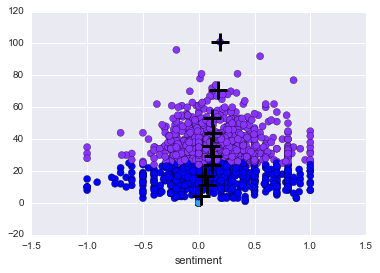

In [314]:
plt.scatter(df_novel.sentiment, df_novel.syl_sum, c=colors2[df_novel.cluster], s=50)
plt.scatter(centers.sentiment, centers.syl_sum, linewidth=3, marker='+', s=300, c='black')
plt.xlabel('sentiment', 'syl_sum')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1292180d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x120c86990>]], dtype=object)

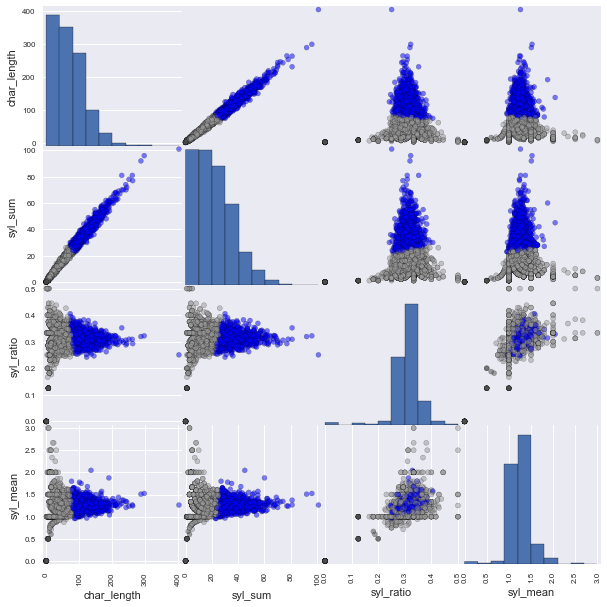

In [311]:
pd.scatter_matrix(X, c=colors[df_novel.cluster], figsize=(10,10), s=100)

In [318]:
b = df_novel[:98][df_novel['cluster'] == 0]

/Users/aliciagyori/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


In [320]:
len(b)

54

In [321]:
c = df_novel[:98][df_novel['cluster'] ==1]
len(c)

/Users/aliciagyori/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


42

In [323]:
d = df_novel[:98][df_novel['cluster']==2]
len(d)

/Users/aliciagyori/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


2

In [326]:
b2 = df_novel[983:1082][df_novel['cluster']==0]
len(b2)

/Users/aliciagyori/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


41

In [327]:
c2 = df_novel[983:1082][df_novel['cluster'] ==1]
len(c2)

/Users/aliciagyori/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


57

In [328]:
d2 = df_novel[983:1082][df_novel['cluster']==2]
len(d2)

/Users/aliciagyori/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


1

In [330]:
b3 = df_novel[1082:1195][df_novel['cluster']==0]
len(b3)

/Users/aliciagyori/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


72

In [332]:
c3 = df_novel[1082:1195][df_novel['cluster'] ==1]
len(c3)

/Users/aliciagyori/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


41

In [333]:
d3 = df_novel[1082:1195][df_novel['cluster']==2]
len(d3)

/Users/aliciagyori/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


0

In [354]:
df_novel['0'][:30]

0                    The Wonderful Wizard of Oz   by...
1                                     The Cyclone    2.
2                  The Council with the Munchkins    3.
3                 How Dorothy Saved the Scarecrow    4.
4                     The Road Through the Forest    5.
5                   The Rescue of the Tin Woodman    6.
6                               The Cowardly Lion    7.
7                     The Journey to the Great Oz    8.
8                          The Deadly Poppy Field    9.
9                     The Queen of the Field Mice   10.
10                      The Guardian of the Gates   11.
11                         The Emerald City of Oz   12.
12                The Search for the Wicked Witch   13.
13                                     The Rescue   14.
14                             The Winged Monkeys   15.
15               The Discovery of Oz the Terrible   16.
16              The Magic Art of the Great Humbug   17.
17                   How the Balloon Was Launche

In [357]:
rem = df_novel[df_novel['char_length'] <= 2]
rem

,0,wrd_length,char_length,syl_count,syl_count_arr,syl_sum,sentiment,syl_ratio,syl_mean,cluster
89,2.,[1],1,[0],[0],0,0.0,0.0,0.0,2
221,3.,[1],1,[0],[0],0,0.0,0.0,0.0,2
344,4.,[1],1,[0],[0],0,0.0,0.0,0.0,2
426,5.,[1],1,[0],[0],0,0.0,0.0,0.0,2
535,6.,[1],1,[0],[0],0,0.0,0.0,0.0,2
578,"""Oh!",[2],2,[1],[1],1,0.0,0.5,1.0,0
632,7.,[1],1,[0],[0],0,0.0,0.0,0.0,2
724,8.,[1],1,[0],[0],0,0.0,0.0,0.0,2
827,9.,[1],1,[0],[0],0,0.0,0.0,0.0,2
901,10.,[2],2,[0],[0],0,0.0,0.0,0.0,2


In [360]:
df = df_novel[df_novel['char_length'] > 2]

In [361]:
len(df)

2246

In [364]:
km = KMeans(n_clusters=3, random_state=1)
km.fit(X)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=1, tol=0.0001,
    verbose=0)

In [365]:
km.labels_

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [366]:
df.head()

,0,wrd_length,char_length,syl_count,syl_count_arr,syl_sum,sentiment,syl_ratio,syl_mean,cluster
0,The Wonderful Wizard of Oz by...,"[3, 9, 6, 2, 2, 2, 1, 5, 4, 8, 12, 1]",55,"[1, 3, 2, 1, 1, 1, 0, 1, 1, 2, 4, 0]","[1, 3, 2, 1, 1, 1, 0, 1, 1, 2, 4, 0]",17,1.0,0.309091,1.416667,0
1,The Cyclone 2.,"[3, 7, 1]",11,"[1, 2, 0]","[1, 2, 0]",3,0.0,0.272727,1.000000,0
2,The Council with the Munchkins 3.,"[3, 7, 4, 3, 9, 1]",27,"[1, 2, 1, 1, 2, 0]","[1, 2, 1, 1, 2, 0]",7,0.0,0.259259,1.166667,0
3,How Dorothy Saved the Scarecrow 4.,"[3, 7, 5, 3, 9, 1]",28,"[1, 3, 1, 1, 3, 0]","[1, 3, 1, 1, 3, 0]",9,0.0,0.321429,1.500000,0
4,The Road Through the Forest 5.,"[3, 4, 7, 3, 6, 1]",24,"[1, 1, 1, 1, 2, 0]","[1, 1, 1, 1, 2, 0]",6,0.0,0.250000,1.000000,0


In [367]:
df = df.drop('cluster', 1)

In [393]:

df = df.drop('syl_count', 1)
df = df.drop('syl_count_arr', 1)
df = df.drop('syl_mean', 1)

In [394]:
df.head()

,0,char_length,syl_sum,sentiment,syl_ratio
0,The Wonderful Wizard of Oz by...,55,17,1.0,0.309091
1,The Cyclone 2.,11,3,0.0,0.272727
2,The Council with the Munchkins 3.,27,7,0.0,0.259259
3,How Dorothy Saved the Scarecrow 4.,28,9,0.0,0.321429
4,The Road Through the Forest 5.,24,6,0.0,0.250000


In [369]:
df['cluster'] = km.labels_
df.sort_values('cluster')

ValueError: Length of values does not match length of index

In [370]:
len(df)

2246

In [371]:
len(df_novel)

2271

In [395]:
X = df.drop('0', axis = 1)

In [396]:
X.head()

,char_length,syl_sum,sentiment,syl_ratio
0,55,17,1.0,0.309091
1,11,3,0.0,0.272727
2,27,7,0.0,0.259259
3,28,9,0.0,0.321429
4,24,6,0.0,0.250000


In [401]:
X.tail()

,char_length,syl_sum,sentiment,syl_ratio
2266,29,8,0.000,0.275862
2267,33,12,0.000,0.363636
2268,16,6,0.000,0.375000
2269,11,4,0.000,0.363636
2270,24,9,0.625,0.375000


In [397]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=1)
km.fit(X)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=1, tol=0.0001,
    verbose=0)

In [398]:
km.labels_

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [399]:
df['cluster'] = km.labels_
df.sort_values('cluster')

,0,char_length,syl_sum,sentiment,syl_ratio,cluster
673,Dorothy thought she would go next; so she took...,109,30,-5.952381e-02,0.275229,0
1700,"""I shall really be very unhappy unless you giv...",84,30,-6.900000e-01,0.357143,0
1698,The True courage is in facing danger when you ...,81,25,1.166667e-01,0.308642,0
811,"But the Scarecrow and the Tin Woodman, not bei...",87,25,2.500000e-01,0.287356,0
812,"""Run fast,"" said the Scarecrow to the Lion, ""a...",76,25,0.000000e+00,0.328947,0
813,"We will bring the little girl with us, but if ...",77,23,-9.375000e-02,0.298701,0
818,"On and on they walked, and it seemed that the ...",92,28,3.000000e-01,0.304348,0
819,"They followed the bend of the river, and at la...",94,29,1.000000e-01,0.308511,0
821,"""We can do nothing for him,"" said the Tin Wood...",67,24,-1.666667e-01,0.358209,0
822,"We must leave him here to sleep on forever, an...",82,27,0.000000e+00,0.329268,0


In [400]:
km.cluster_centers_

array([[  8.87186441e+01,   2.77841808e+01,   1.12368623e-01,
          3.13729351e-01],
       [  3.17988722e+01,   1.00291353e+01,   4.67254898e-02,
          3.13798529e-01],
       [  1.56956229e+02,   4.83973064e+01,   1.32724832e-01,
          3.08807648e-01]])

In [402]:
df2 = df_novel[df_novel['char_length'] > 2]

In [403]:
len(df2)

2246

In [404]:
df2.head()

,0,wrd_length,char_length,syl_count,syl_count_arr,syl_sum,sentiment,syl_ratio,syl_mean,cluster
0,The Wonderful Wizard of Oz by...,"[3, 9, 6, 2, 2, 2, 1, 5, 4, 8, 12, 1]",55,"[1, 3, 2, 1, 1, 1, 0, 1, 1, 2, 4, 0]","[1, 3, 2, 1, 1, 1, 0, 1, 1, 2, 4, 0]",17,1.0,0.309091,1.416667,0
1,The Cyclone 2.,"[3, 7, 1]",11,"[1, 2, 0]","[1, 2, 0]",3,0.0,0.272727,1.000000,0
2,The Council with the Munchkins 3.,"[3, 7, 4, 3, 9, 1]",27,"[1, 2, 1, 1, 2, 0]","[1, 2, 1, 1, 2, 0]",7,0.0,0.259259,1.166667,0
3,How Dorothy Saved the Scarecrow 4.,"[3, 7, 5, 3, 9, 1]",28,"[1, 3, 1, 1, 3, 0]","[1, 3, 1, 1, 3, 0]",9,0.0,0.321429,1.500000,0
4,The Road Through the Forest 5.,"[3, 4, 7, 3, 6, 1]",24,"[1, 1, 1, 1, 2, 0]","[1, 1, 1, 1, 2, 0]",6,0.0,0.250000,1.000000,0


In [408]:
df2 = df2.drop('cluster', 1)


In [409]:
df2.head()

,0,wrd_length,char_length,syl_count,syl_count_arr,syl_sum,sentiment,syl_ratio,syl_mean
0,The Wonderful Wizard of Oz by...,"[3, 9, 6, 2, 2, 2, 1, 5, 4, 8, 12, 1]",55,"[1, 3, 2, 1, 1, 1, 0, 1, 1, 2, 4, 0]","[1, 3, 2, 1, 1, 1, 0, 1, 1, 2, 4, 0]",17,1.0,0.309091,1.416667
1,The Cyclone 2.,"[3, 7, 1]",11,"[1, 2, 0]","[1, 2, 0]",3,0.0,0.272727,1.000000
2,The Council with the Munchkins 3.,"[3, 7, 4, 3, 9, 1]",27,"[1, 2, 1, 1, 2, 0]","[1, 2, 1, 1, 2, 0]",7,0.0,0.259259,1.166667
3,How Dorothy Saved the Scarecrow 4.,"[3, 7, 5, 3, 9, 1]",28,"[1, 3, 1, 1, 3, 0]","[1, 3, 1, 1, 3, 0]",9,0.0,0.321429,1.500000
4,The Road Through the Forest 5.,"[3, 4, 7, 3, 6, 1]",24,"[1, 1, 1, 1, 2, 0]","[1, 1, 1, 1, 2, 0]",6,0.0,0.250000,1.000000


In [411]:
km = KMeans(n_clusters=3, random_state=1)
km.fit(X)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=1, tol=0.0001,
    verbose=0)

In [412]:
km.labels_

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [413]:
df2['cluster'] = km.labels_
df2.sort_values('cluster')

,0,wrd_length,char_length,syl_count,syl_count_arr,syl_sum,sentiment,syl_ratio,syl_mean,cluster
673,Dorothy thought she would go next; so she took...,"[7, 7, 3, 5, 2, 4, 2, 3, 4, 4, 2, 3, 4, 3, 7, ...",109,"[3, 1, 0, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 1, ...","[3, 1, 0, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 1, ...",30,-5.952381e-02,0.275229,1.071429,0
1700,"""I shall really be very unhappy unless you giv...","[1, 5, 6, 2, 4, 7, 6, 3, 4, 2, 3, 4, 2, 7, 4, ...",84,"[1, 1, 3, 1, 2, 3, 2, 1, 1, 1, 1, 1, 1, 2, 1, ...","[1, 1, 3, 1, 2, 3, 2, 1, 1, 1, 1, 1, 1, 2, 1, ...",30,-6.900000e-01,0.357143,1.428571,0
1698,The True courage is in facing danger when you ...,"[3, 4, 7, 2, 2, 6, 6, 4, 3, 3, 6, 3, 4, 4, 2, ...",81,"[1, 0, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, ...","[1, 0, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, ...",25,1.166667e-01,0.308642,1.250000,0
811,"But the Scarecrow and the Tin Woodman, not bei...","[3, 3, 9, 3, 3, 3, 7, 3, 5, 4, 2, 5, 4, 3, 8, ...",87,"[1, 1, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, ...",25,2.500000e-01,0.287356,1.190476,0
812,"""Run fast,"" said the Scarecrow to the Lion, ""a...","[3, 4, 4, 3, 9, 2, 3, 4, 3, 3, 3, 2, 4, 6, 6, ...",76,"[1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, ...","[1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, ...",25,0.000000e+00,0.328947,1.190476,0
813,"We will bring the little girl with us, but if ...","[2, 4, 5, 3, 6, 4, 4, 2, 3, 2, 3, 6, 4, 6, 3, ...",77,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, ...",23,-9.375000e-02,0.298701,1.095238,0
818,"On and on they walked, and it seemed that the ...","[2, 3, 2, 4, 6, 3, 2, 6, 4, 3, 5, 6, 2, 6, 7, ...",92,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 2, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 2, ...",28,3.000000e-01,0.304348,1.333333,0
819,"They followed the bend of the river, and at la...","[4, 8, 3, 4, 2, 3, 5, 3, 2, 4, 4, 4, 5, 6, 3, ...",94,"[1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, ...","[1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, ...",29,1.000000e-01,0.308511,1.318182,0
821,"""We can do nothing for him,"" said the Tin Wood...","[2, 3, 2, 7, 3, 3, 4, 3, 3, 7, 5, 3, 2, 2, 4, ...",67,"[1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, ...","[1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, ...",24,-1.666667e-01,0.358209,1.263158,0
822,"We must leave him here to sleep on forever, an...","[2, 4, 5, 3, 4, 2, 5, 2, 7, 3, 7, 2, 4, 5, 4, ...",82,"[1, 1, 2, 1, 1, 1, 1, 1, 3, 1, 2, 1, 1, 2, 1, ...","[1, 1, 2, 1, 1, 1, 1, 1, 3, 1, 2, 1, 1, 2, 1, ...",27,0.000000e+00,0.329268,1.285714,0


In [414]:
km.cluster_centers_

array([[  8.87186441e+01,   2.77841808e+01,   1.12368623e-01,
          3.13729351e-01],
       [  3.17988722e+01,   1.00291353e+01,   4.67254898e-02,
          3.13798529e-01],
       [  1.56956229e+02,   4.83973064e+01,   1.32724832e-01,
          3.08807648e-01]])

In [415]:
df2.groupby('cluster').mean()

,char_length,syl_sum,sentiment,syl_ratio,syl_mean
cluster,,,,,
0,88.680995,27.769231,0.112383,0.313704,1.253023
1,31.798872,10.029135,0.046725,0.313799,1.250839
2,156.838926,48.372483,0.132615,0.308899,1.270230


In [416]:
clust_0 = df2[df2['cluster'] == 0]
len(clust_0)

884

In [417]:
clust_1 = df2[df2['cluster'] ==1]
len(clust_1)

1064

In [418]:
clust_2 = df2[df2['cluster'] ==2]
len(clust_2)

298

In [424]:
centers = df2.groupby('cluster').mean()

In [422]:
colors = np.array(['red', 'green', 'blue', 'yellow'])

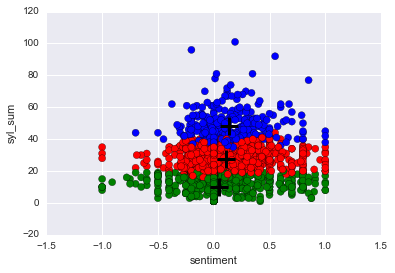

In [425]:
# scatter plot of calories versus alcohol, colored by cluster (0=red, 1=green, 2=blue)
plt.scatter(df2.sentiment, df2.syl_sum, c=colors[df2.cluster], s=50)

# cluster centers, marked by "+"
plt.scatter(centers.sentiment, centers.syl_sum, linewidths=3, marker='+', s=300, c='black')

# add labels
plt.xlabel('sentiment')
plt.ylabel('syl_sum')

In [426]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [427]:
km = KMeans(n_clusters=3, random_state=1)
km.fit(X_scaled)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=1, tol=0.0001,
    verbose=0)

In [428]:
df2['cluster'] = km.labels_
df2.sort_values('sentiment')

,0,wrd_length,char_length,syl_count,syl_count_arr,syl_sum,sentiment,syl_ratio,syl_mean,cluster
1260,When the Wicked Witch looked out again and saw...,"[4, 3, 6, 5, 6, 3, 5, 3, 3, 3, 3, 5, 5, 2, 1, ...",121,"[1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, ...",35,-1.000000,0.289256,1.166667,2
1908,"The Scarecrow was thinking again, and his head...","[3, 9, 3, 8, 5, 3, 3, 4, 6, 3, 2, 8, 4, 7, 6, ...",86,"[1, 3, 1, 2, 2, 1, 1, 2, 1, 1, 1, 3, 1, 3, 2, ...","[1, 3, 1, 2, 2, 1, 1, 2, 1, 1, 1, 3, 1, 3, 2, ...",28,-1.000000,0.325581,1.555556,1
1641,And the Tin Woodman saw that his terrible Beas...,"[3, 3, 3, 7, 3, 4, 3, 8, 5, 3, 7, 3, 1, 3, 2, ...",103,"[1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, ...","[1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, ...",31,-1.000000,0.300971,1.240000,2
684,"""They must be dreadful beasts.""","[4, 4, 2, 8, 6]",24,"[1, 1, 1, 3, 2]","[1, 1, 1, 3, 2]",8,-1.000000,0.333333,1.600000,1
1613,"""But this is terrible,"" said the Tin Woodman.","[3, 4, 2, 8, 4, 3, 3, 7]",34,"[1, 1, 1, 2, 1, 1, 1, 2]","[1, 1, 1, 2, 1, 1, 1, 2]",10,-1.000000,0.294118,1.250000,1
15,The Discovery of Oz the Terrible 16.,"[3, 9, 2, 2, 3, 8, 2]",29,"[1, 4, 1, 1, 1, 2, 0]","[1, 4, 1, 1, 1, 2, 0]",10,-1.000000,0.344828,1.428571,1
951,"""Why do you wish to see the terrible Oz?""","[3, 2, 3, 4, 2, 3, 3, 8, 2]",30,"[1, 1, 1, 1, 1, 1, 1, 2, 1]","[1, 1, 1, 1, 1, 1, 1, 2, 1]",10,-1.000000,0.333333,1.111111,1
1596,"""And I thought Oz was a terrible Beast,"" said ...","[3, 1, 7, 2, 3, 1, 8, 5, 4, 3, 3, 7]",47,"[1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2]","[1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2]",15,-1.000000,0.319149,1.250000,1
1678,"""I think you are a very bad man,"" said Dorothy.","[1, 5, 3, 3, 1, 4, 3, 3, 4, 7]",34,"[1, 1, 1, 1, 1, 2, 1, 1, 1, 3]","[1, 1, 1, 1, 1, 2, 1, 1, 1, 3]",13,-0.910000,0.382353,1.300000,1
2080,"""That would make me very unhappy,"" answered th...","[4, 5, 4, 2, 4, 7, 8, 3, 5, 8]",50,"[1, 1, 1, 1, 2, 3, 2, 1, 2, 2]","[1, 1, 1, 1, 2, 3, 2, 1, 2, 2]",16,-0.780000,0.320000,1.600000,1


In [429]:
df2.groupby('cluster').mean()

,char_length,syl_sum,sentiment,syl_ratio,syl_mean
cluster,,,,,
0,71.732227,23.165877,0.492943,0.326029,1.288508
1,39.082192,12.132705,-0.040039,0.310074,1.239777
2,126.596037,39.157012,0.041653,0.310209,1.258054


In [430]:
a = df2[df2['cluster'] == 0]
len(a)

422

In [431]:
b = df2[df2['cluster'] ==1]
len(b)

1168

In [433]:
c = df2[df2['cluster'] ==2]
len(c)

656

In [434]:
from sklearn import metrics
metrics.silhouette_score(X_scaled, km.labels_)

0.31883802584294524

In [ ]:
k_range = range(2,200)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(X_scaled)
    scores.append(metrics.silhouette_score(X_scaled, km.labels_))

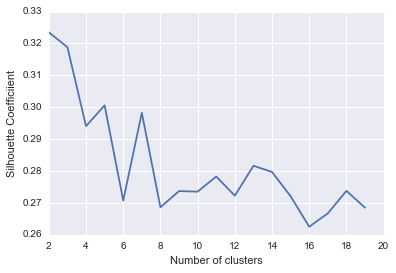

In [436]:
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficiient')